<p align="center">
  <img src="../../Imagenes/logo_vitocode.jpg" alt="Logo vitocode.ds" width="200"/>
</p>


<h1 align="center">@vitocode.ds</h1>

<p align="center">
  <strong>Víctor Bórquez</strong><br>
  Ciencia de Datos · Inteligencia Artificial · Divulgación técnica con propósito
</p>

<hr>

> Este notebook forma parte del contenido desarrollado por **vitocode.ds**, una iniciativa para explorar y enseñar ciencia de datos desde la práctica, con enfoque claro, ético y aplicado.

---


## Importamos las librerías necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## 1. Carga de Datos & Exploración

In [9]:
data = pd.read_csv('../Data Sets/cardio_train.csv', sep=';')

In [10]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 2. Preprocesamiento de Datos y Limpieza

Vemos que la columna id no nos entrega información relevante, por lo que la eliminamos.

In [ ]:
data.drop(['id'], axis=1, inplace=True)

Leyendo la documentación del dataset, nos damos cuenta que la columna `age` esta en dias, por lo que la convertimos a años.

In [ ]:
data['age'] = (data['age'] / 365).round().astype(int)

Ahora codificamos las columnas categoricas usando OneHotEncoder

In [ ]:
data = pd.get_dummies(data, columns=['gender', 'cholesterol', 'gluc'])

## 3. Visualización de Datos

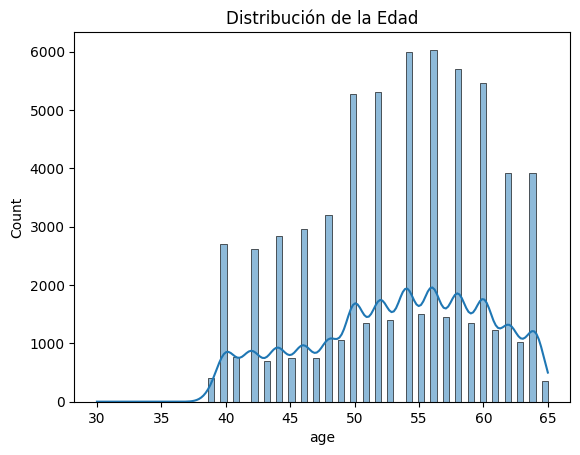

In [ ]:
# Histograma de la edad
sns.histplot(data['age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()


Vemos que el estudio fue concetrado en personas sobre los 50 años

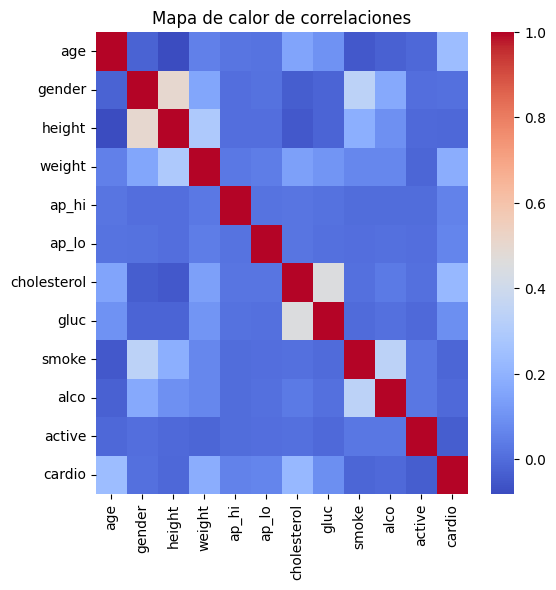

In [ ]:
# Correlación entre variables
corr = data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

## 4. Selección de categorías y entrenamiento del modelo

Como queremos predecir si tiene una enfermedad cardiaca, seleccionamos las columnas que nos interesan

In [ ]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

Ahora normalizamos las categorías

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Ahora separamos los datos en train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos a entrenar un modelo de regresión logística

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

## 5. Evaluación del modelo

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7215

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Matriz de Confusión:
 [[5344 1644]
 [2255 4757]]


El modelo indica que logro acerta un 72.15% de los casos, respecto a los datos de testeo. En el contexto del dataset, la situación más preocupante es cuando el modelo predice que una persona no tiene enfermedad cardiaca y en realidad sí la tiene. Esto se conoce como un falso negativo, y puede llevar a que una persona no reciba el tratamiento adecuado. Este caso representaría un 32% de los casos, lo que representa un porcentaje bastante alto.